### Geological models and synthetic seismograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from math import sqrt, pi

Creating simple geological models with changing characteristics 

In [3]:
model = np.ones((250, 250, 250))

# Model of homogenous layers, Vp|Vs

model_vpvs = model.copy()
model_vpvs[:, :, 0:50] *= 2.5
model_vpvs[:, :, 50:100] *= 2.
model_vpvs[:, :, 100:150] *= 2.5
model_vpvs[:, :, 150:200] *= 1.45
model_vpvs[:, :, 200:250] *= 2.5

# Model of homogenous layers, acoustic impedance

model_imp = model.copy()
model_imp[:, :, :50] *= 5500
model_imp[:, :, 50:100] *= 6000
model_imp[:, :, 100:150] *= 5500
model_imp[:, :, 150:200] *= 4000
model_imp[:, :, 200:250] *= 5500

# Model of heterougenius layers, Vp|Vs

model_vpvs_ch = model.copy()

model_vpvs_ch[:, :, :50] *= 2.5
# 1.8 - 2.2
contrast = 0.0008
for x in range(model.shape[0]):
    for y in range(model.shape[1]):      
        model_vpvs_ch[x, y, 50:100] *= (1.8 + contrast * (x + y))

contrast = 0.0003
model_vpvs_ch[:, :, 100:150] *= 2.5
# 1.4 - 1.55
for x in range(model.shape[0]):
    for y in range(model.shape[1]):      
        model_vpvs_ch[x, y, 150:200] *= (1.4 + contrast * (x + y))


model_vpvs_ch[:, :, 200:250] *= 2.5

# Model of heterogenious layers, acoustic impedance 

model_imp_ch = model.copy()
model_imp_ch[:, :, :50] *= 5500
# 5000 - 7000
contrast = 4
for x in range(model.shape[0]):
    for y in range(model.shape[1]):      
        model_imp_ch[x, y, 50:100] *= (7000 - contrast * (x + y))
model_imp_ch[:, :, 100:150] *= 5500
# 3500 - 6000
contrast = 5
for x in range(model.shape[0]):
    for y in range(model.shape[1]):      
        model_imp_ch[x, y, 150:200] *= (6000 - contrast * (x + y))
model_imp_ch[:, :, 200:250] *= 5500


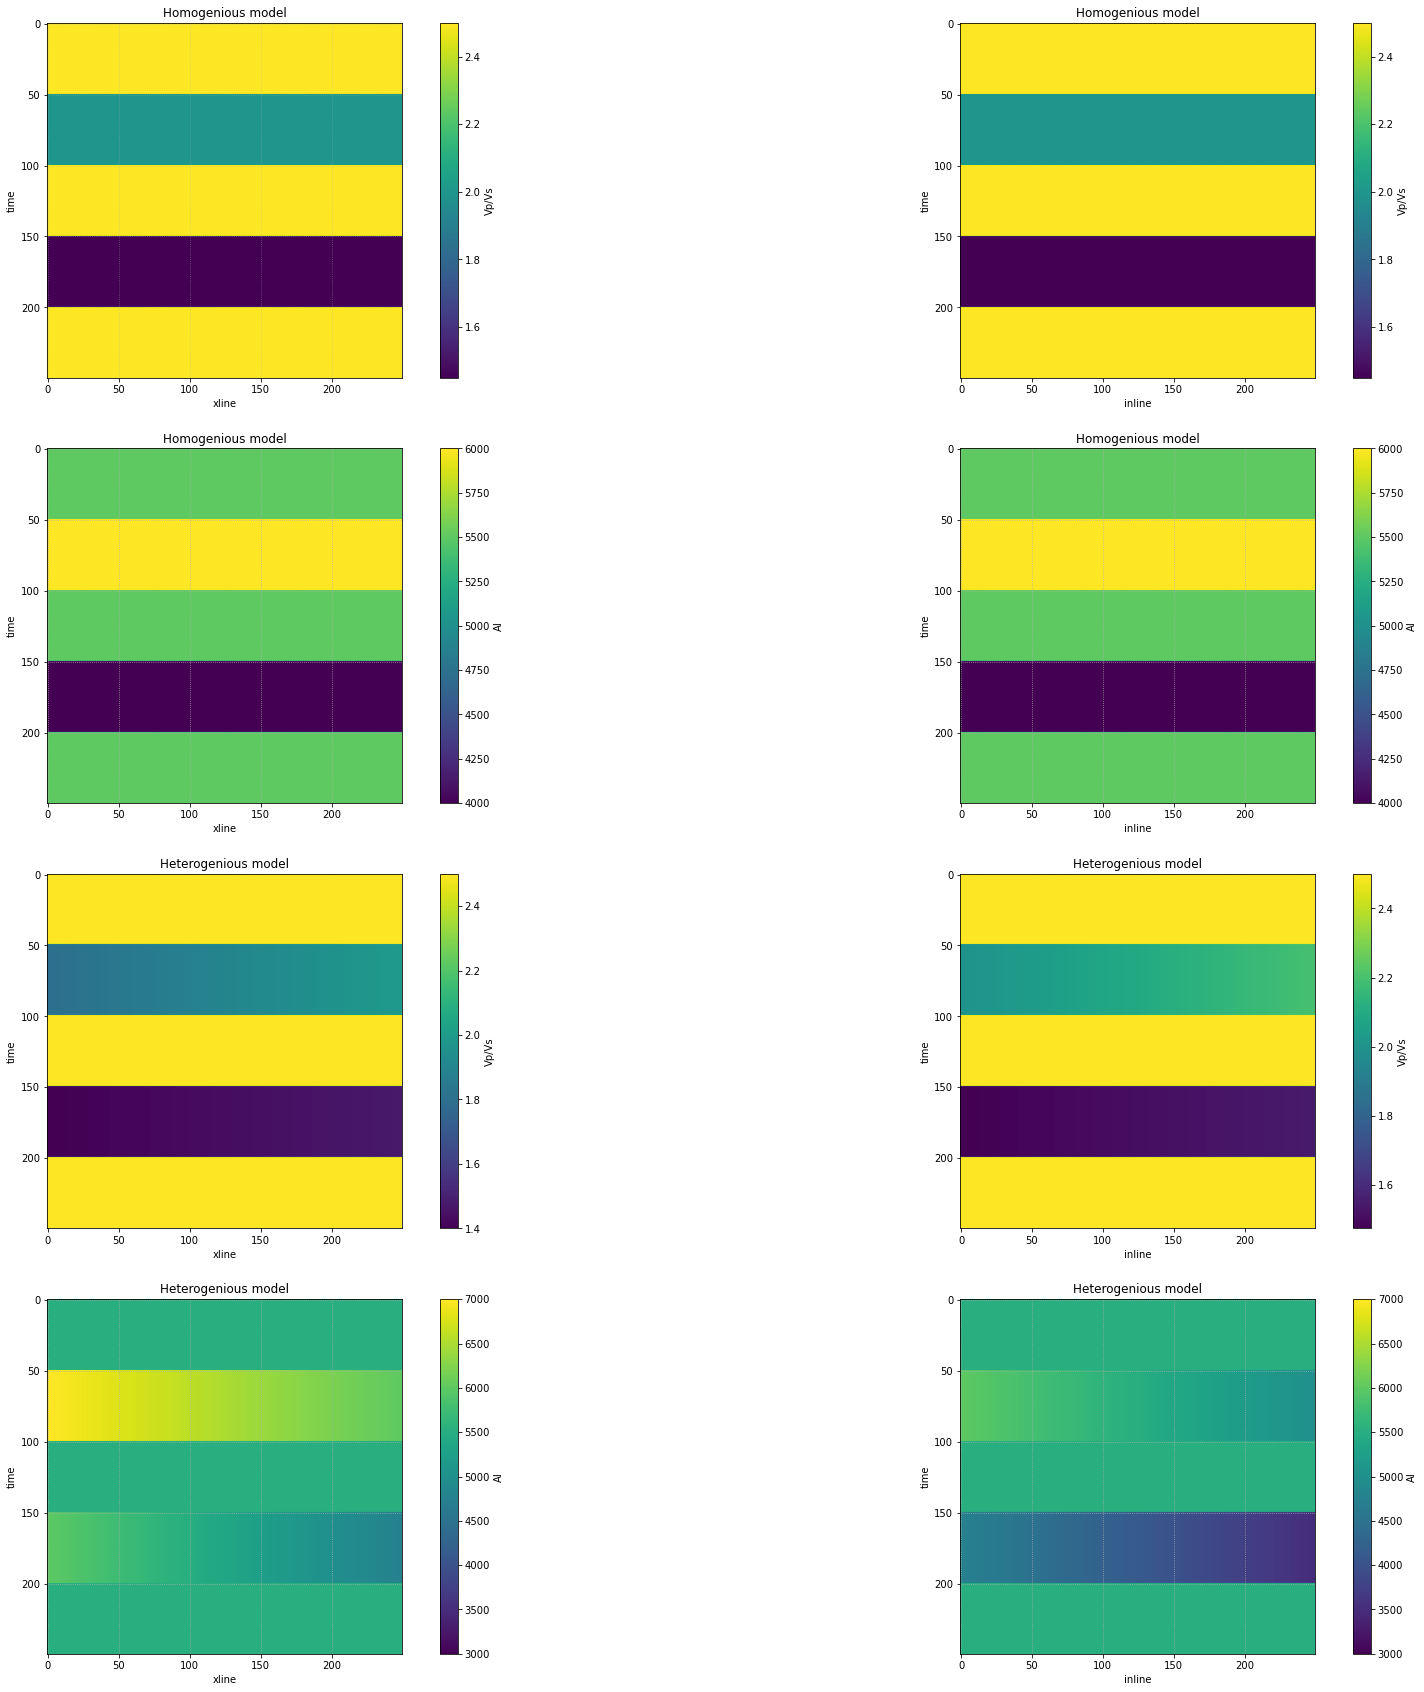

In [5]:
# Visualization by cross-section

plt.figure(figsize=(30, 30))
plt.subplot(421) 
plt.imshow(model_vpvs[0,:,:].transpose()) 
plt.title('Homogenious model')
plt.xlabel('xline')
plt.ylabel('time') 
plt.grid(ls=':',alpha=.5) 
plt.colorbar(shrink=1, label='Vp/Vs')


plt.subplot(422)
plt.imshow(model_vpvs[:,-1,:].transpose()) 
plt.title('Homogenious model')
plt.xlabel('inline')
plt.ylabel('time')
plt.grid(ls=':',alpha=.005)
plt.colorbar(shrink=1, label='Vp/Vs')


plt.subplot(423)
plt.imshow(model_imp[0,:,:].transpose()) 
plt.title('Homogenious model')
plt.xlabel('xline')
plt.ylabel('time')
plt.grid(ls=':',alpha=10)
plt.colorbar(shrink=1, label='AI')


plt.subplot(424)
plt.imshow(model_imp[:,-1,:].transpose())
plt.title('Homogenious model')
plt.xlabel('inline')
plt.ylabel('time')
plt.grid(ls=':',alpha=10)
plt.colorbar(shrink=1, label='AI') 


plt.subplot(425)
plt.imshow(model_vpvs_ch[0,:,:].transpose()) 
plt.title('Heterogenious model')
plt.xlabel('xline') 
plt.ylabel('time') 
plt.grid(ls=':',alpha=.005) 
plt.colorbar(shrink=1, label='Vp/Vs')


plt.subplot(426)
plt.imshow(model_vpvs_ch[:,-1,:].transpose()) 
plt.title('Heterogenious model')
plt.xlabel('inline')
plt.ylabel('time')
plt.grid(ls=':',alpha=.005)
plt.colorbar(shrink=1, label='Vp/Vs' )


plt.subplot(427)
plt.imshow(model_imp_ch[0,:,:].transpose(), vmax = model_imp_ch.max(), vmin = 3000) 
plt.title('Heterogenious model')
plt.xlabel('xline')
plt.ylabel('time')
plt.grid(ls=':',alpha=10)
plt.colorbar(shrink=1, label='AI')


plt.subplot(428)
plt.imshow(model_imp_ch[:,-1,:].transpose(), vmax = model_imp_ch.max(), vmin = 3000) 
plt.title('Heterogenious model')
plt.xlabel('inline')
plt.ylabel('time')
plt.grid(ls=':',alpha=10)
plt.colorbar(shrink=1, label='AI')


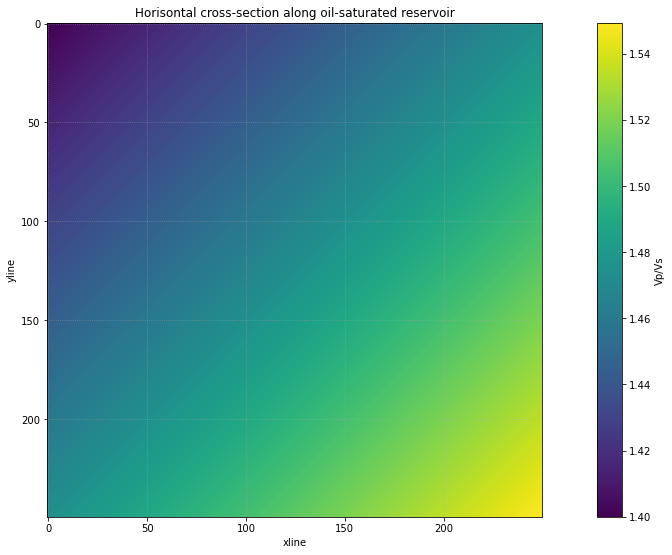

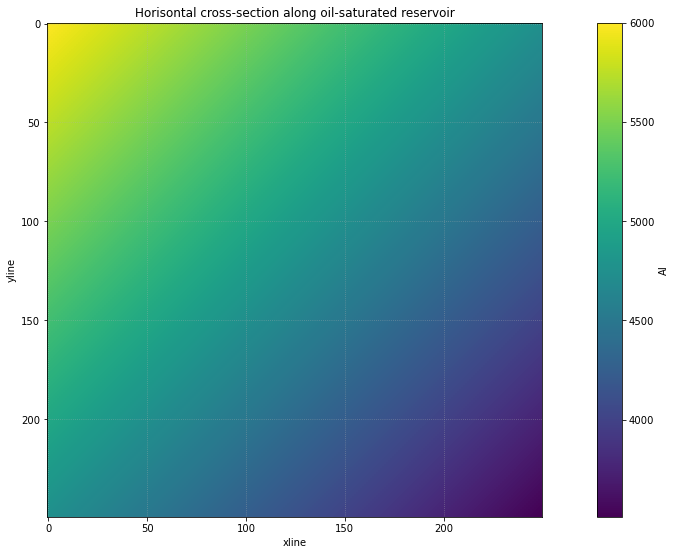

In [7]:
plt.figure(figsize=(20, 20))
plt.subplot(211) 
plt.imshow(model_vpvs_ch[:,:,175].transpose())
plt.title('Horisontal cross-section along oil-saturated reservoir')
plt.xlabel('xline') 
plt.ylabel('yline') 
plt.grid(ls=':',alpha=.5)
plt.colorbar(shrink=1, label='Vp/Vs')


plt.figure(figsize=(20, 20))
plt.subplot(211) 
plt.imshow(model_imp_ch[:,:,175].transpose())
plt.title('Horisontal cross-section along oil-saturated reservoir')
plt.xlabel('xline') 
plt.ylabel('yline') 
plt.grid(ls=':',alpha=.5) 
plt.colorbar(shrink=1, label='AI')


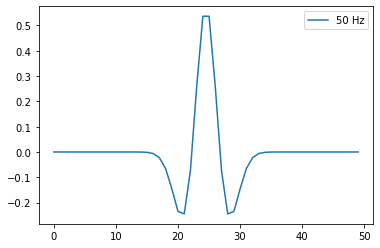

In [8]:
# length - lenght of signal in samples
# step - sampling step

# Mexican hat

def signal_config(length, step, signal_freq):
    diskret_freq = 1./step
    a = diskret_freq/(sqrt(2.0)*pi*signal_freq)
    return plt.plot(signal.ricker(length, a), label=f'{signal_freq} Hz'), plt.legend()

signal_config(50, 0.002, 50)

plt.savefig('signal.png')

In [9]:
# Calculating of Reflection Coeffitients 


rpp_imp = np.zeros(model.shape)
rpp_imp_ch = np.zeros(model.shape)


for x in range(model.shape[0]):
    for y in range(model.shape[1]):
        for t in range(model.shape[2]-1):
            rpp_imp[x,y,t] = (model_imp[x,y,t+1]-model_imp[x,y,t])/(model_imp[x,y,t+1]+model_imp[x,y,t])           
            
for x in range(model.shape[0]):
    for y in range(model.shape[1]):
        for t in range(model.shape[2]-1):
            rpp_imp_ch[x,y,t] = (model_imp_ch[x,y,t+1]-model_imp_ch[x,y,t])/(model_imp_ch[x,y,t+1]+model_imp_ch[x,y,t])            

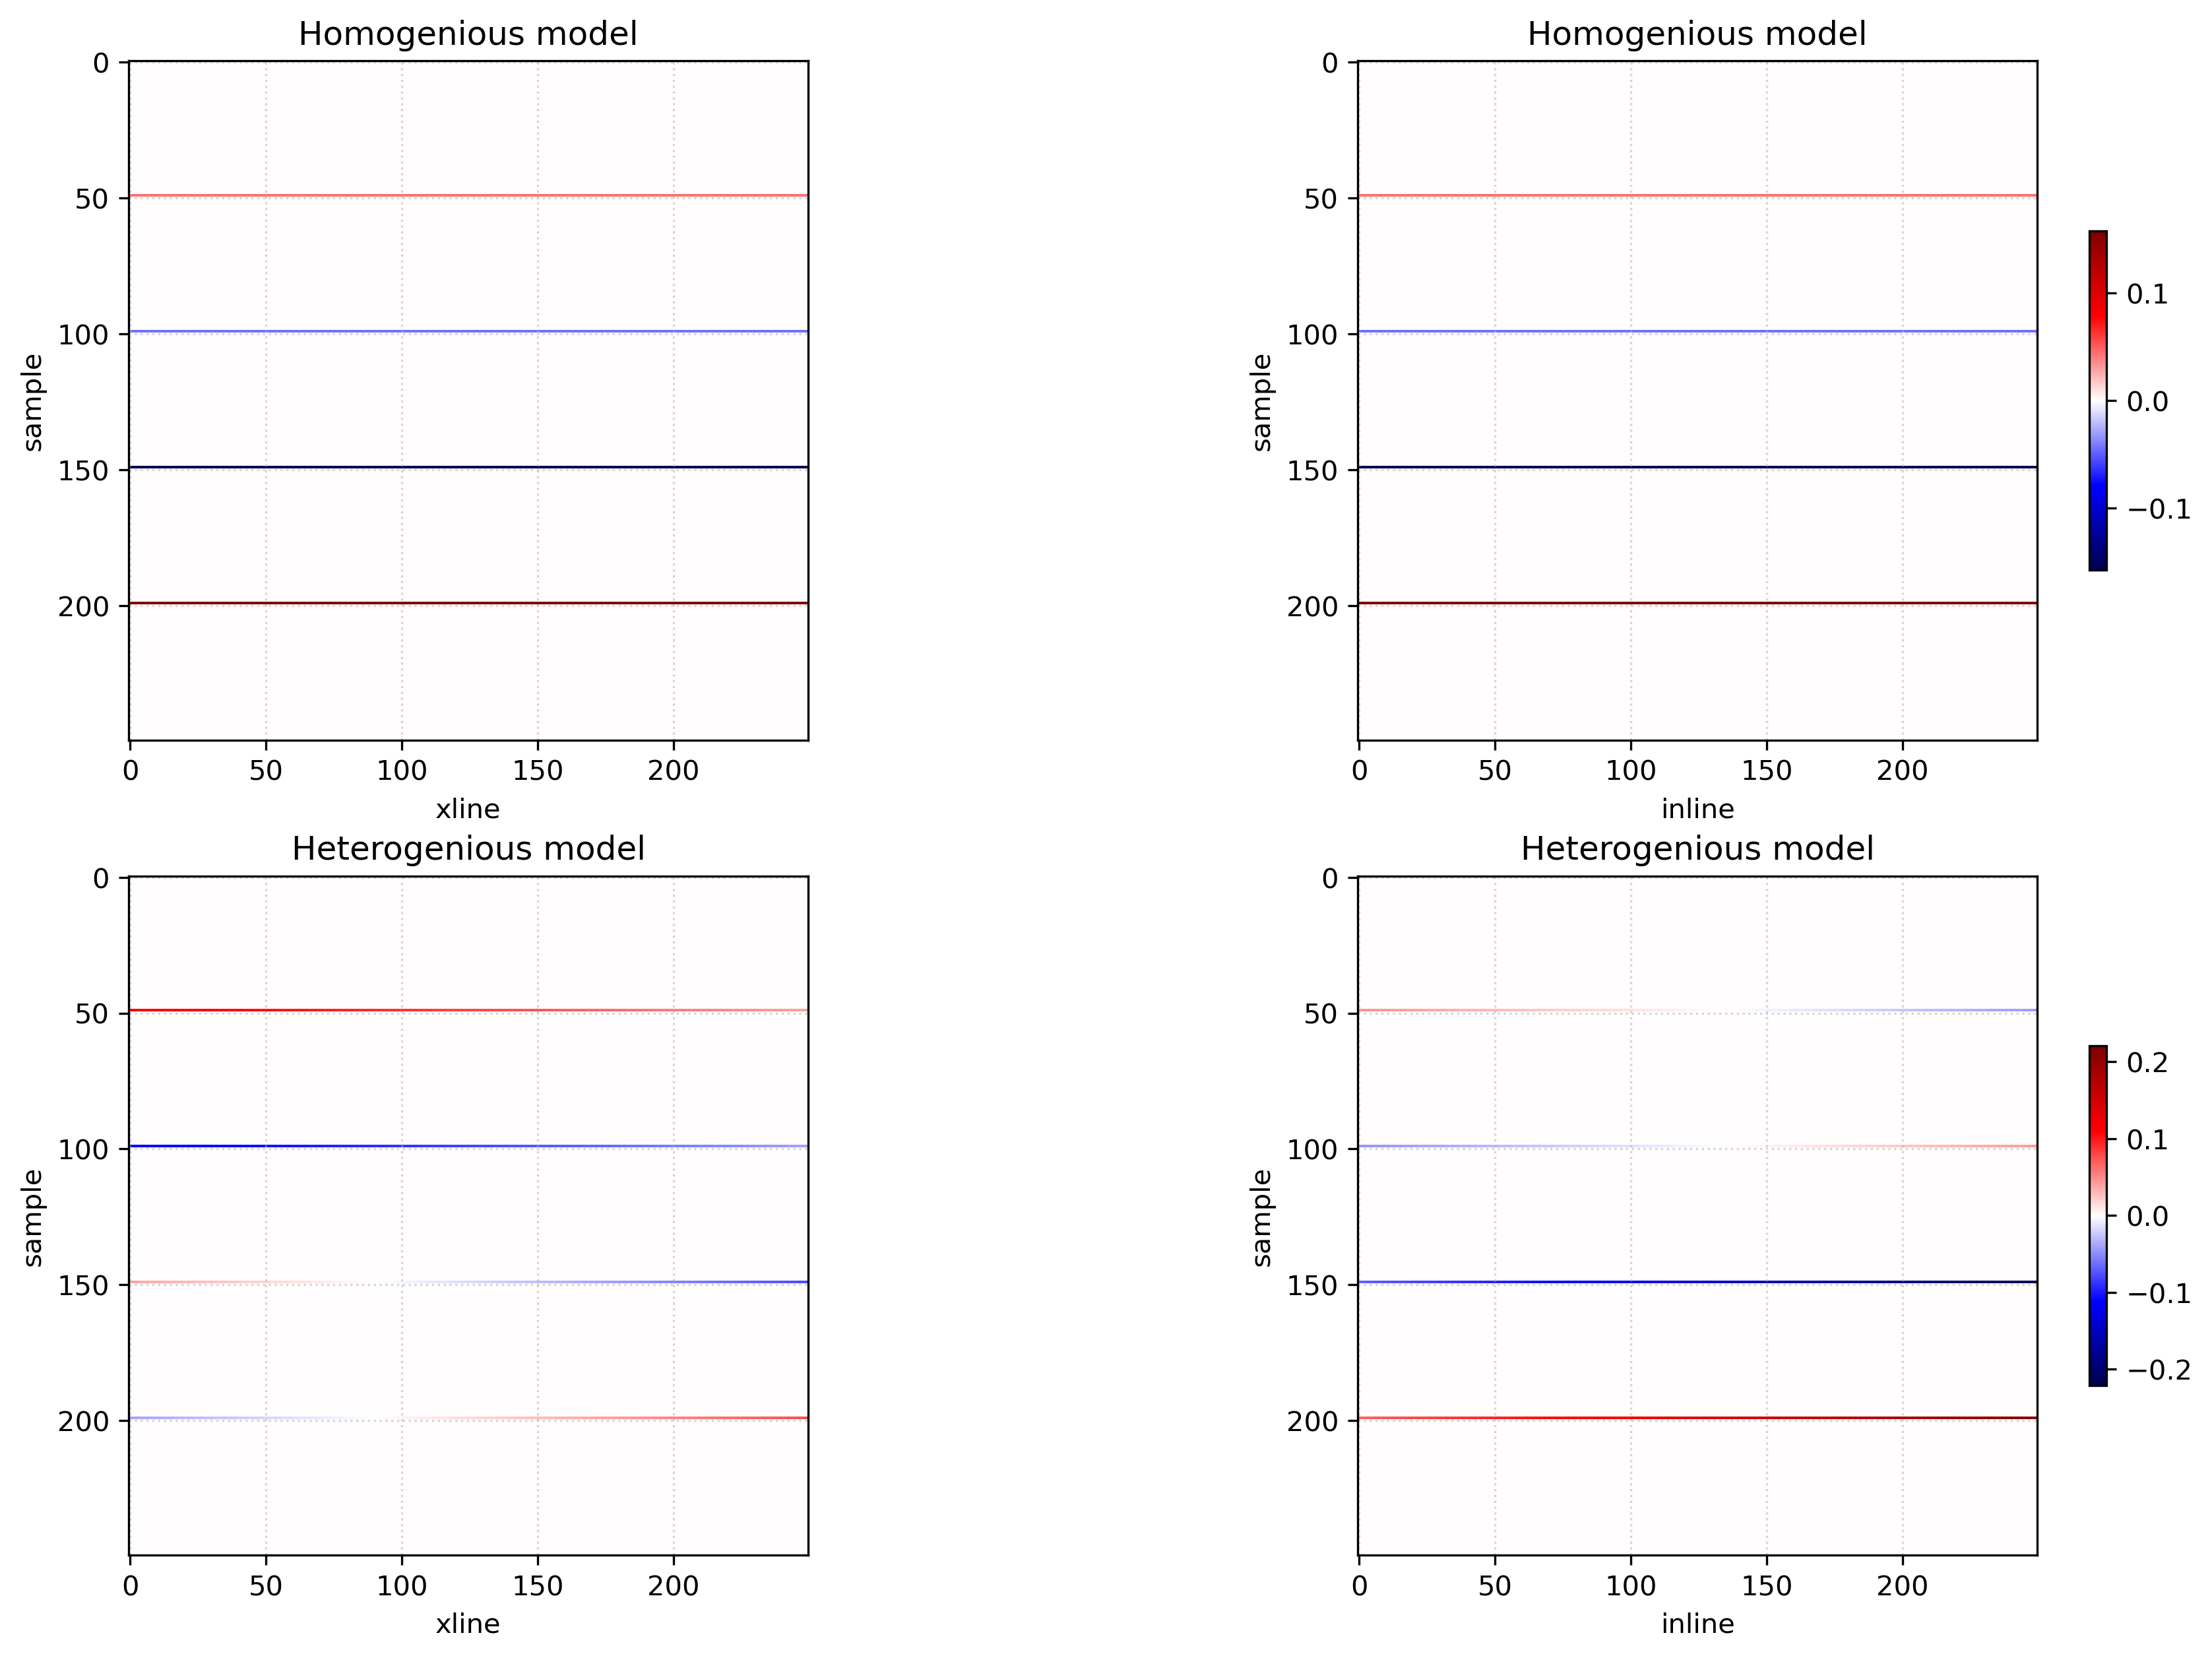

In [10]:
plt.figure(figsize=(15, 10), dpi=300)

plt.subplot(221)
plt.imshow(rpp_imp[10,:,:].transpose(), vmax = rpp_imp.max(), vmin = -rpp_imp.max(), cmap='seismic')
plt.title('Homogenious model')
plt.xlabel('xline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=0.5)

plt.subplot(222)
plt.imshow(rpp_imp[:,-10,:].transpose(), vmax = rpp_imp.max(), vmin = -rpp_imp.max(), cmap='seismic')
plt.title('Homogenious model')
plt.xlabel('inline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=0.5)
plt.colorbar(shrink=0.5)


plt.subplot(223)
plt.imshow(rpp_imp_ch[10,:,:].transpose(), vmax = rpp_imp_ch.max(), vmin = -rpp_imp_ch.max(), cmap='seismic')
plt.title('Heterogenious model')
plt.xlabel('xline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=0.5)

plt.subplot(224)
plt.imshow(rpp_imp_ch[:,-10,:].transpose(), vmax = rpp_imp_ch.max(), vmin = -rpp_imp_ch.max(), cmap='seismic')
plt.title('Heterogenious model')
plt.xlabel('inline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=0.5)
plt.colorbar(shrink=0.5)

In [11]:
# Synthetic seismograms (Convolution of Mexican hat and RC)

s1 = np.zeros(model.shape)
s2 = np.zeros(model.shape)

points = 50
dt = 0.002
freq = 50

bfreq = 1./dt 
a = bfreq/(sqrt(2.0)*pi*freq) 

for x in range(0, rpp_imp.shape[0]):
        for y in range(0, model.shape[1]):
            s1[x,y,:] = np.convolve(rpp_imp[x,y,:], signal.ricker(points, a), mode='same') 
            
for x in range(0, rpp_imp_ch.shape[0]):
        for y in range(0, model.shape[1]):
            s2[x,y,:] = np.convolve(rpp_imp_ch[x,y,:], signal.ricker(points, a), mode='same')     

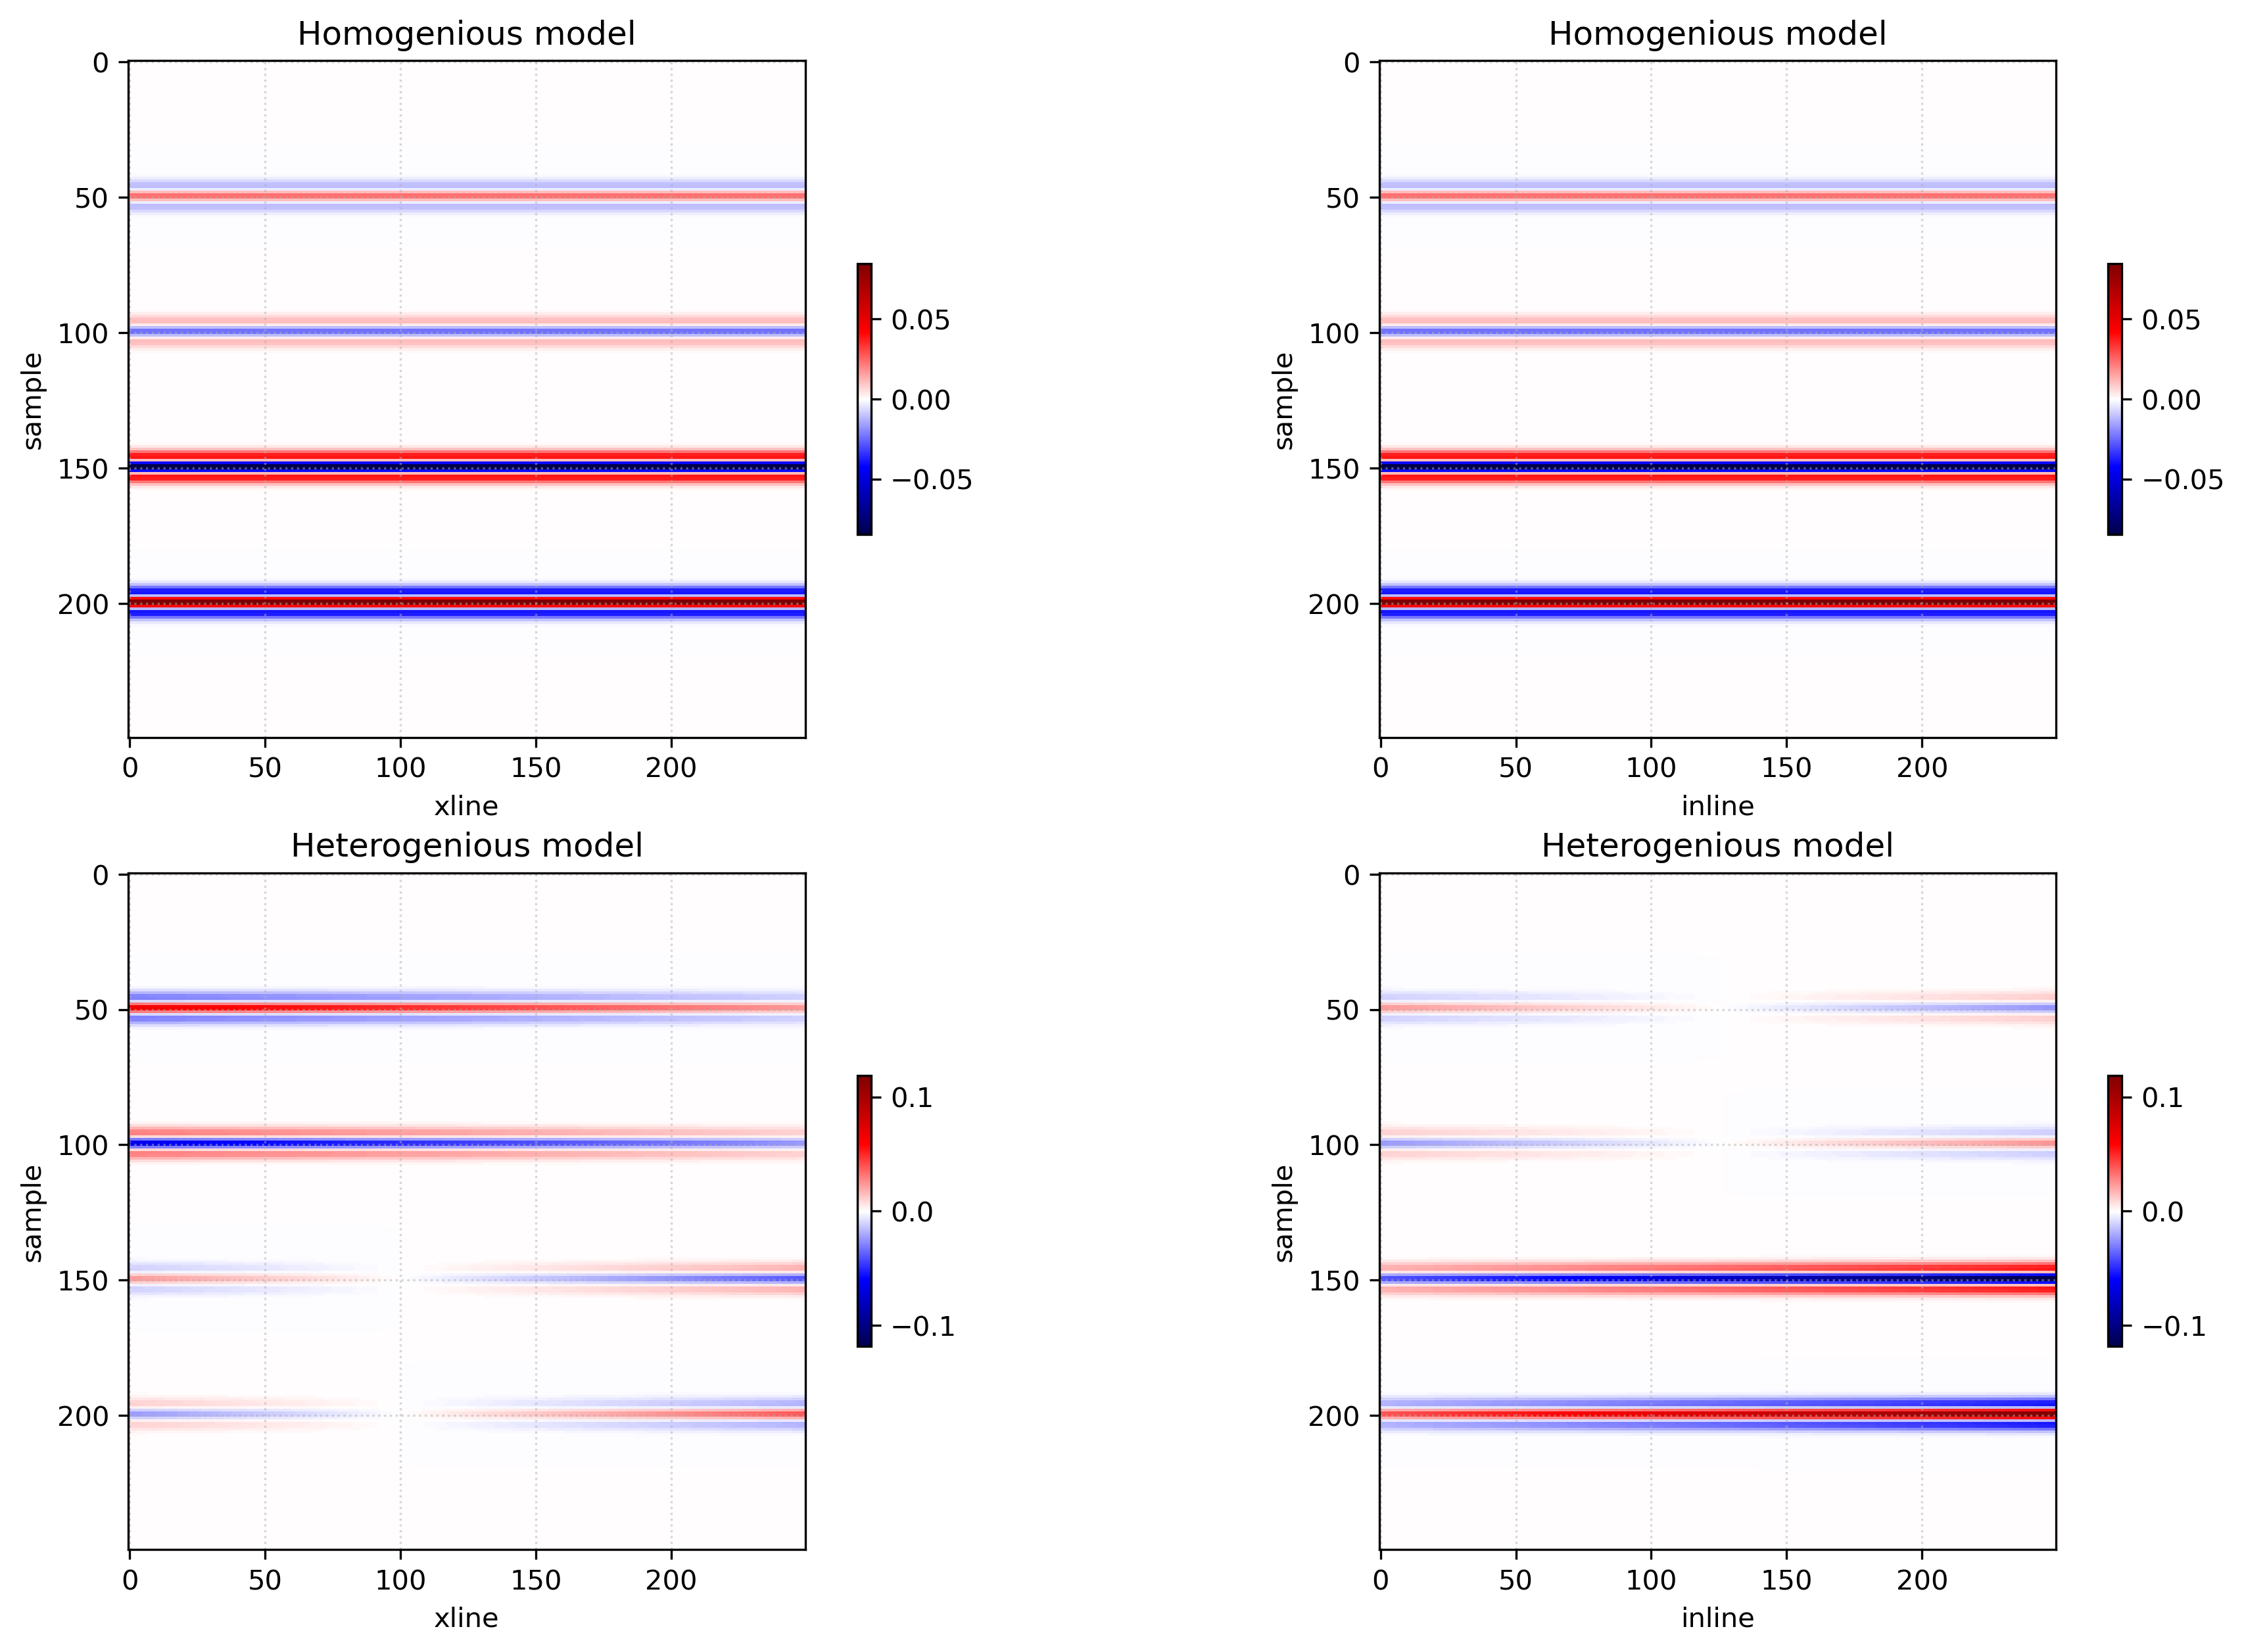

In [13]:
plt.figure(figsize=(15, 10), dpi=300)

plt.subplot(221)
plt.imshow(s1[0,:,:].transpose(), vmax = s1.max(), vmin = -s1.max(), cmap='seismic') 
plt.title('Homogenious model')
plt.xlabel('xline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=.5)
plt.colorbar(shrink=0.4)

plt.subplot(222)
plt.imshow(s1[:,-1,:].transpose(), vmax = s1.max(), vmin = -s1.max(), cmap='seismic') 
plt.title('Homogenious model')
plt.xlabel('inline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=.5)
plt.colorbar(shrink=0.4)

plt.subplot(223)
plt.imshow(s2[0,:,:].transpose(), vmax = s2.max(), vmin = -s2.max(), cmap='seismic') 
plt.title('Heterogenious model')
plt.xlabel('xline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=.5)
plt.colorbar(shrink=0.4)

plt.subplot(224)
plt.imshow(s2[:,-1,:].transpose(), vmax = s2.max(), vmin = -s2.max(), cmap='seismic') 
plt.title('Heterogenious model')
plt.xlabel('inline')
plt.ylabel('sample')
plt.grid(ls=':',alpha=.5)
plt.colorbar(shrink=0.4)


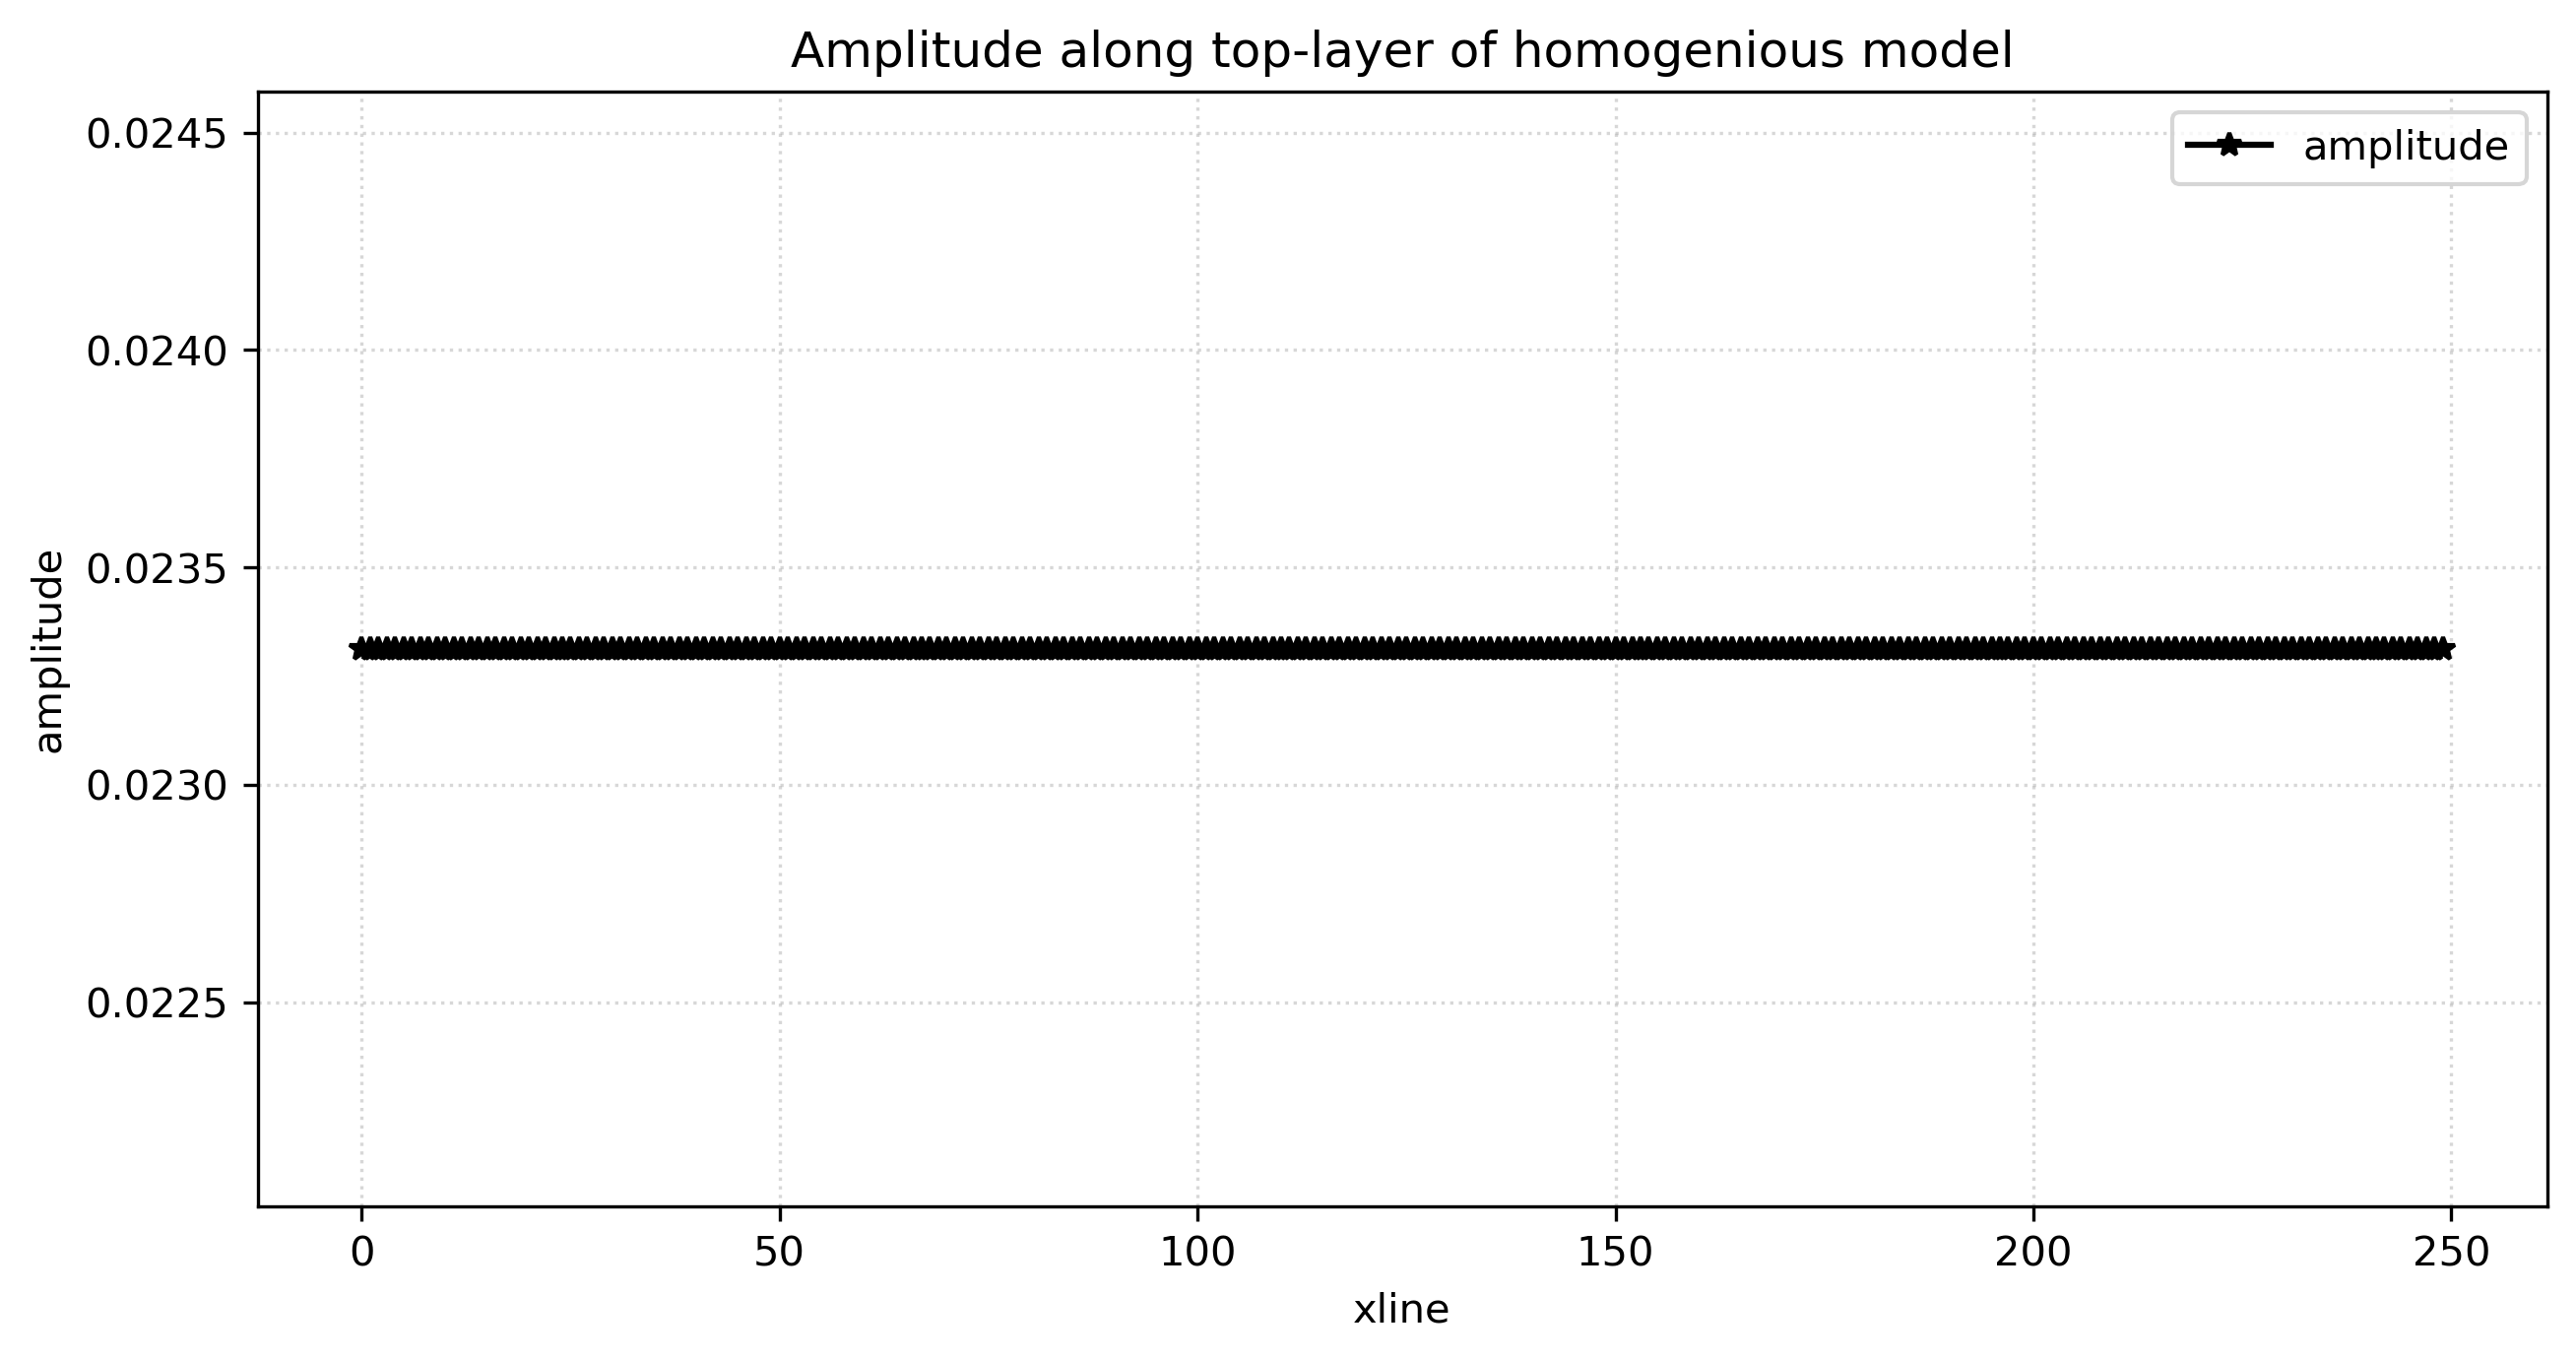

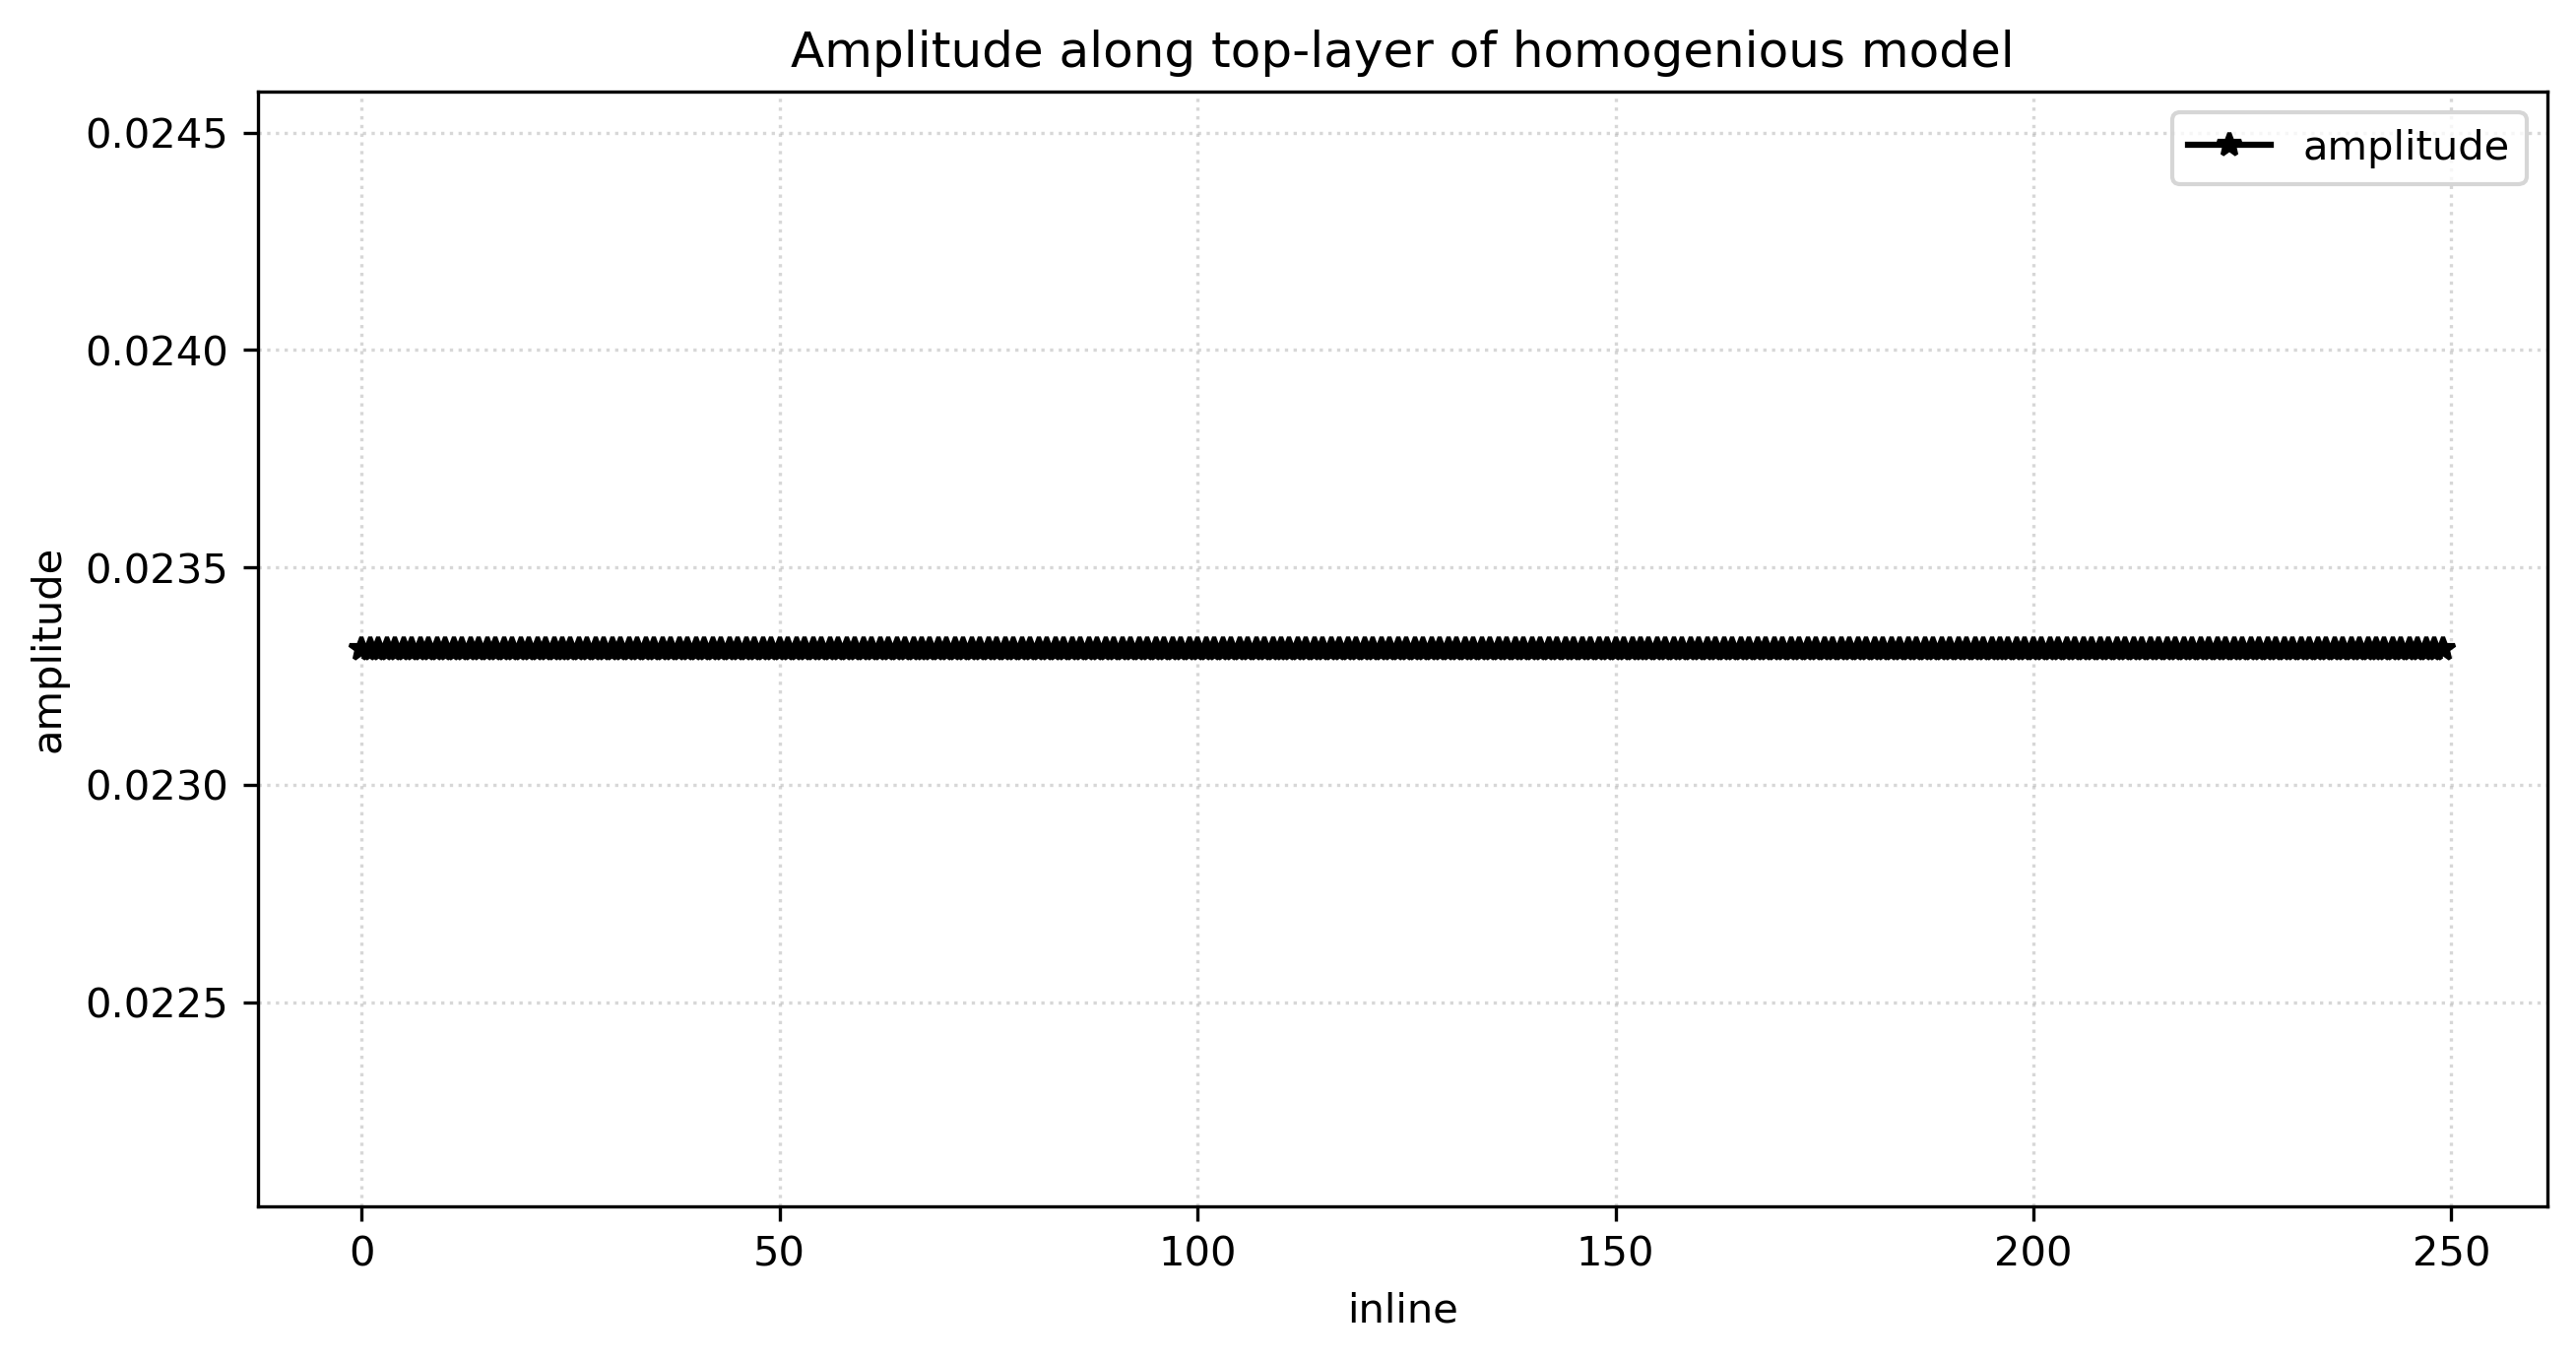

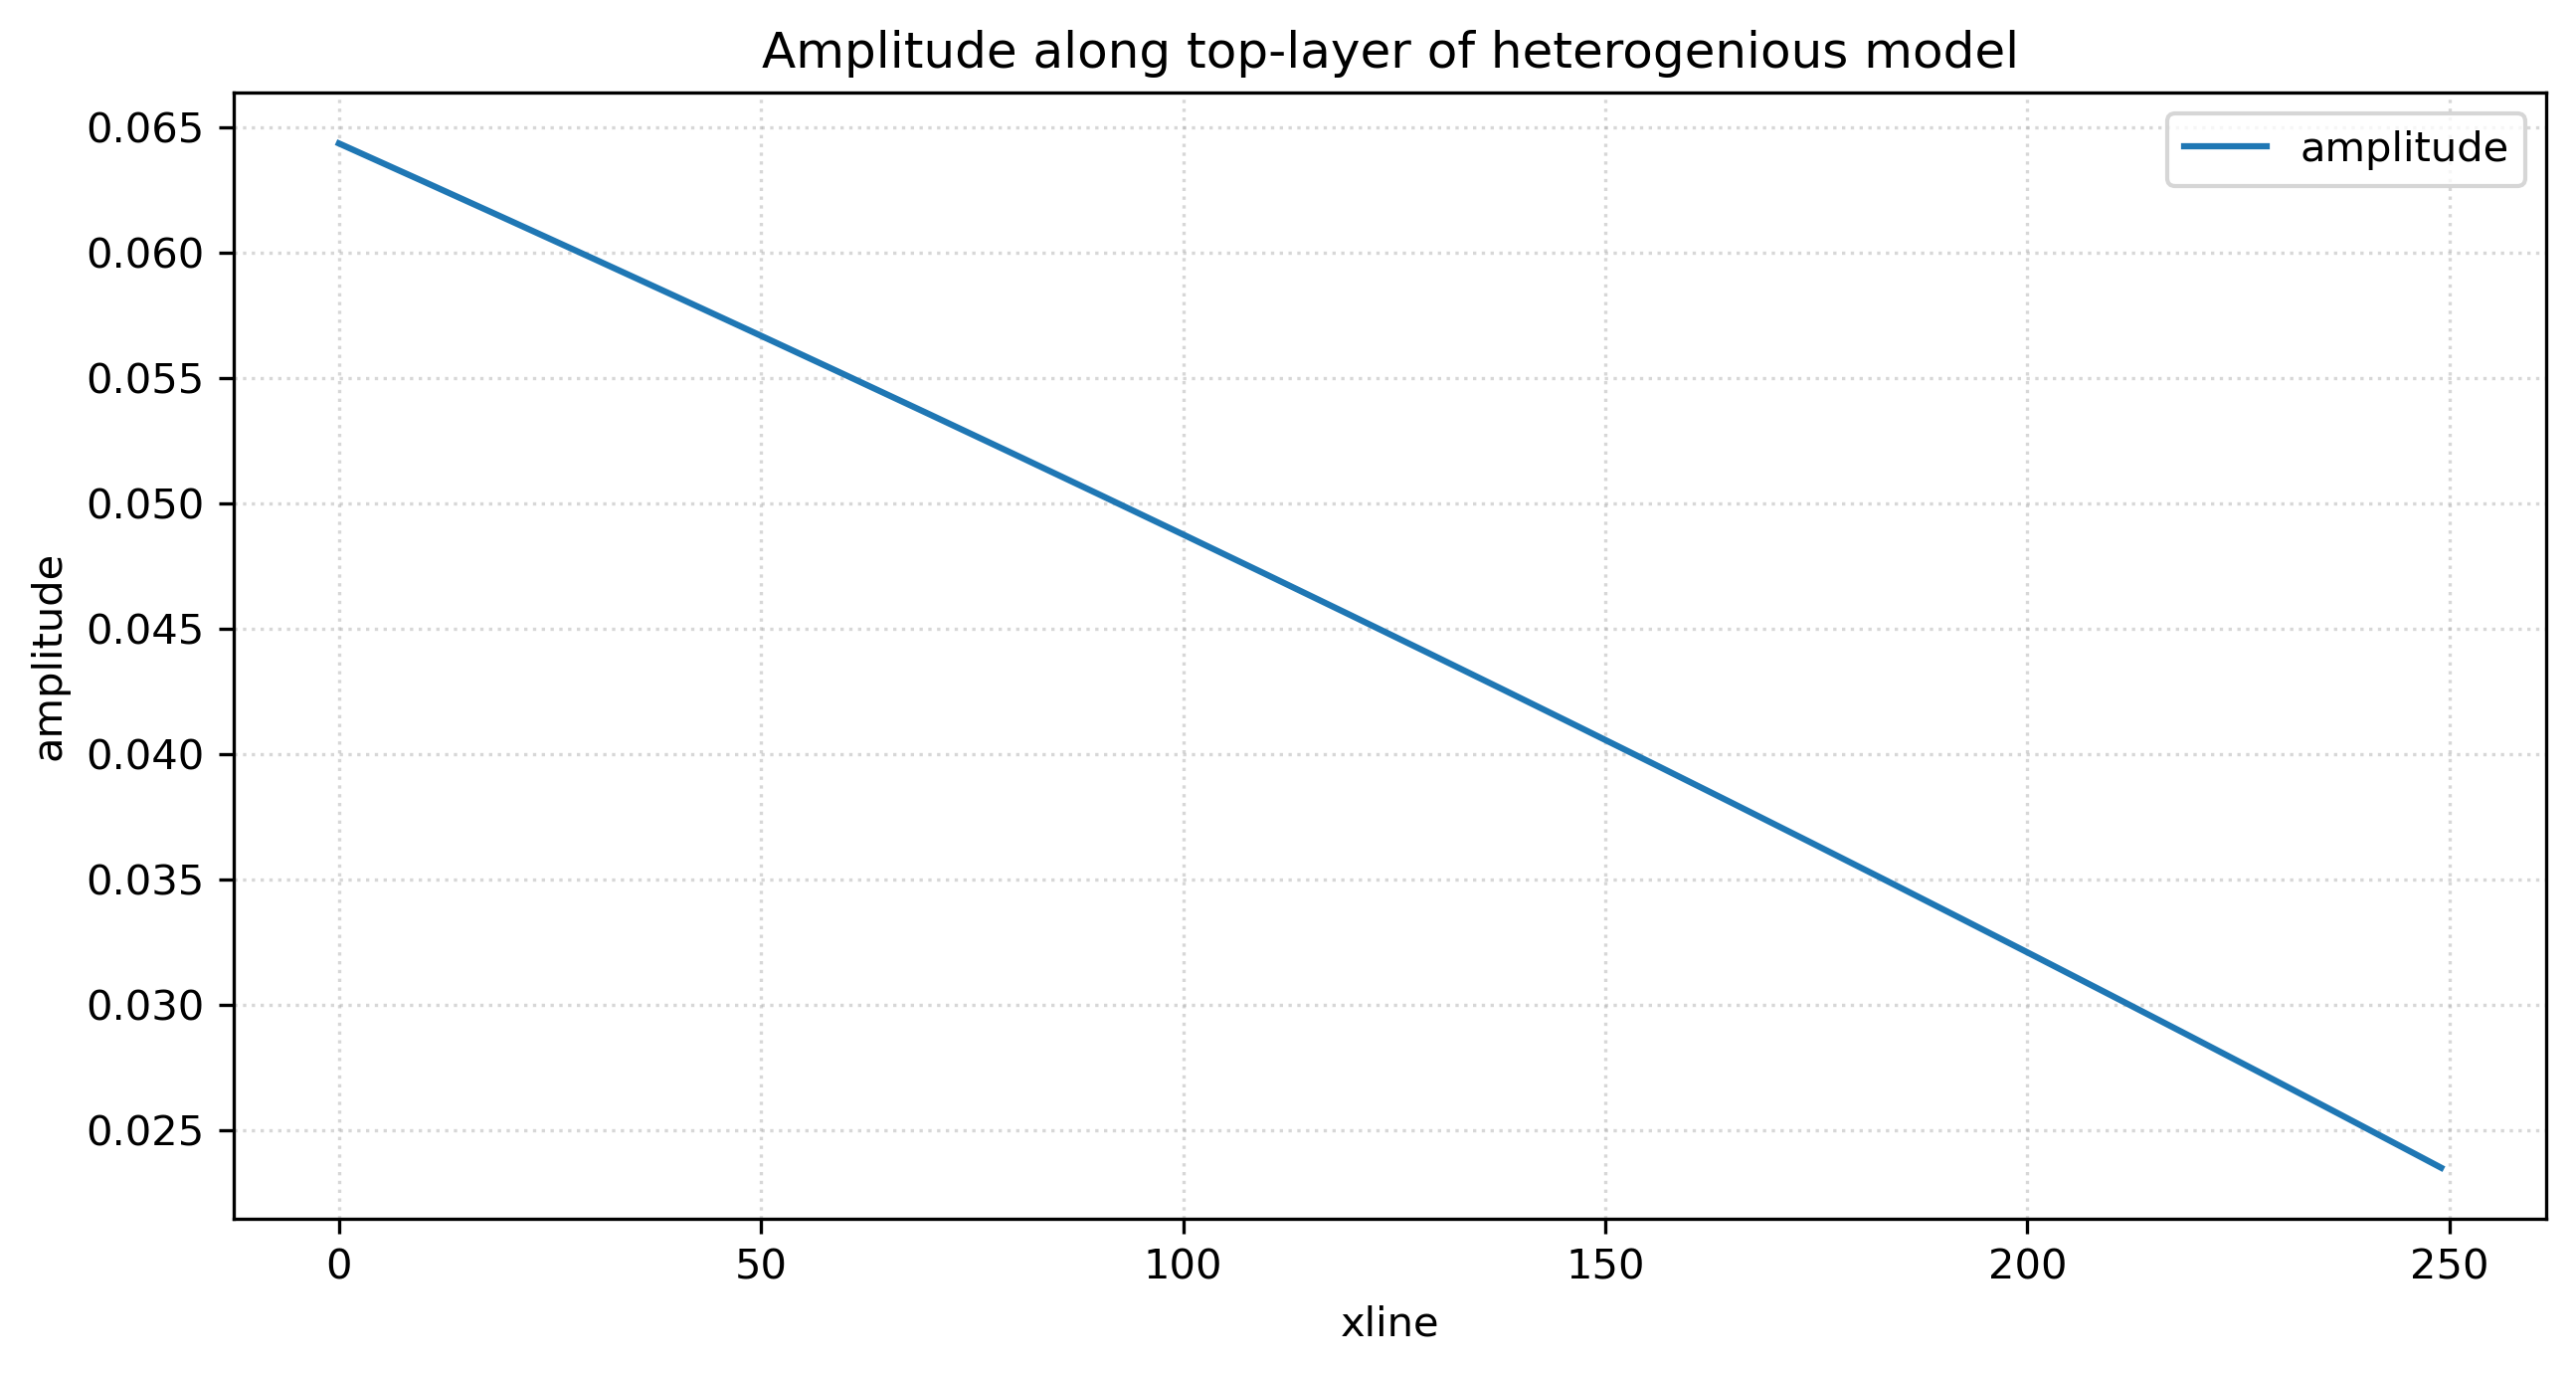

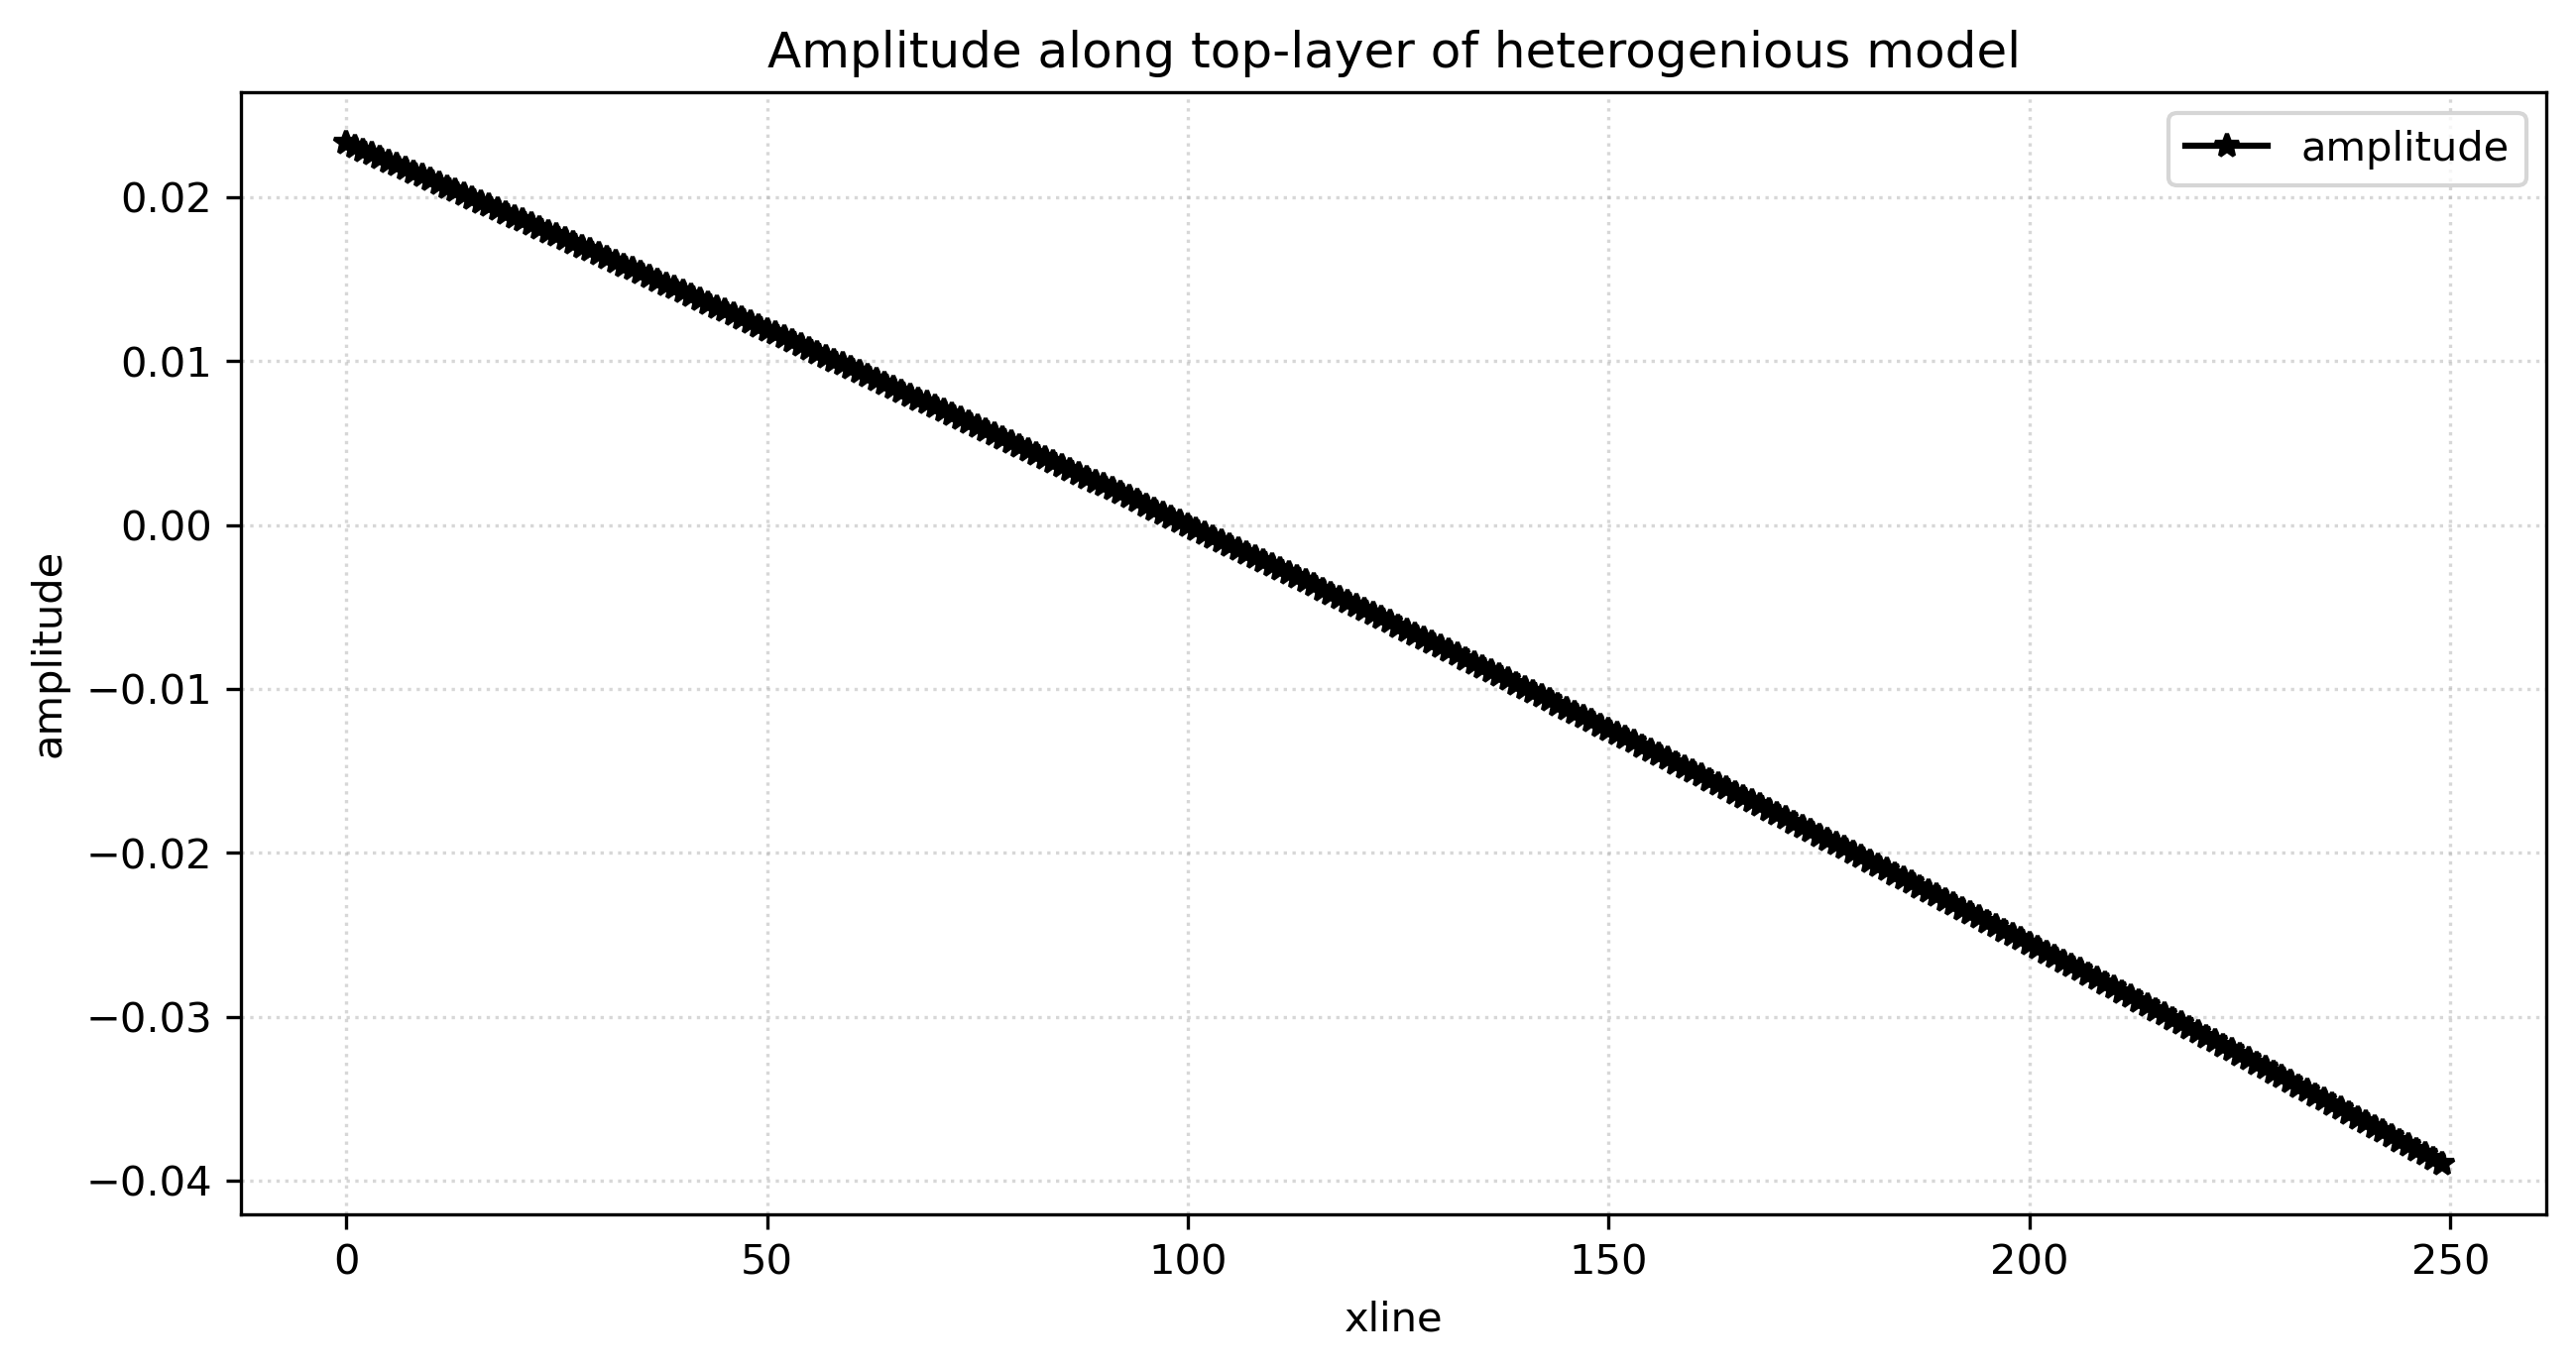

In [14]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title('Amplitude along top-layer of homogenious model')
plt.plot(s1[0,:,49], '-*k', label = 'amplitude') 
plt.xlabel('xline')
plt.ylabel('amplitude')
plt.legend()
plt.grid(ls=':',alpha=.5)

plt.figure(figsize=(10, 5), dpi=300)
plt.title('Amplitude along top-layer of homogenious model')
plt.plot(s1[:,-1,50], '-*k', label = 'amplitude') 
plt.xlabel('inline')
plt.ylabel('amplitude')
plt.legend()
plt.grid(ls=':',alpha=.5)

plt.figure(figsize=(10, 5), dpi=300)
plt.title('Amplitude along top-layer of heterogenious model')
plt.plot(s2[0,:,50], label = 'amplitude') 
plt.xlabel('xline')
plt.ylabel('amplitude')
plt.legend()
plt.grid(ls=':',alpha=.5)

plt.figure(figsize=(10, 5), dpi=300)
plt.title('Amplitude along top-layer of heterogenious model')
plt.plot(s2[0,:,150], '-*k', label = 'amplitude') 
plt.xlabel('xline')
plt.ylabel('amplitude')
plt.legend()
plt.grid(ls=':',alpha=.5)


Text(0, 0.5, 'Amplitude')

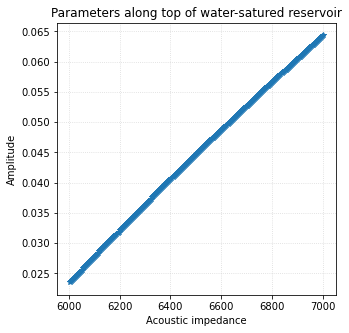

In [15]:
plt.figure(figsize=(5,5))
plt.plot(model_imp_ch[0,:,50], s2[0,:,50], '-*')
plt.grid(ls=':',alpha=.5)
plt.title('Parameters along top of water-satured reservoir')
plt.xlabel('Acoustic impedance')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

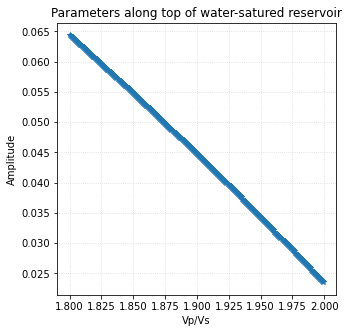

In [16]:
plt.figure(figsize=(5,5))
plt.plot(model_vpvs_ch[0,:,50], s2[0,:,50], '-*')
plt.grid(ls=':',alpha=.5)
plt.title('Parameters along top of water-satured reservoir')
plt.xlabel('Vp/Vs')
plt.ylabel('Amplitude')

In [17]:
# Zoeppritz function returns RC depending on angle of incidence

def zoeppritz_rpp(vp1, vs1, rho1, vp2, vs2, rho2, theta1=0):
    """
    Exact Zoeppritz from expression.
    Dvorkin et al. (2014). Seismic Reflections of Rock Properties. Cambridge.
    Returns the complex reflectivity.

    """
    theta1 = np.radians(theta1).astype(complex)

    p = np.sin(theta1) / vp1  # Ray parameter
    theta2 = np.arcsin(p * vp2)
    phi1 = np.arcsin(p * vs1)  # Reflected S
    phi2 = np.arcsin(p * vs2)  # Transmitted S

    a = rho2 * (1 - 2 * np.sin(phi2)**2.) - rho1 * (1 - 2 * np.sin(phi1)**2.)
    b = rho2 * (1 - 2 * np.sin(phi2)**2.) + 2 * rho1 * np.sin(phi1)**2.
    c = rho1 * (1 - 2 * np.sin(phi1)**2.) + 2 * rho2 * np.sin(phi2)**2.
    d = 2 * (rho2 * vs2**2 - rho1 * vs1**2)

    E = (b * np.cos(theta1) / vp1) + (c * np.cos(theta2) / vp2)
    F = (b * np.cos(phi1) / vs1) + (c * np.cos(phi2) / vs2)
    G = a - d * np.cos(theta1)/vp1 * np.cos(phi2)/vs2
    H = a - d * np.cos(theta2)/vp2 * np.cos(phi1)/vs1

    D = E*F + G*H*p**2

    rpp = (1/D) * (F*(b*(np.cos(theta1)/vp1) - c*(np.cos(theta2)/vp2)) \
                   - H*p**2 * (a + d*(np.cos(theta1)/vp1)*(np.cos(phi2)/vs2)))

    return np.squeeze(rpp)

<ipython-input-18-e40ddc36b106>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  rc[z] = zoeppritz_rpp(2500, 900, 2400, 3200, 1800, 2500, theta1=ang[z])
<ipython-input-18-e40ddc36b106>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  rc[z] = zoeppritz_rpp(2500, 900, 2400, 2600, 1700, 2300, theta1=ang[z])


Text(0, 0.5, 'RC')

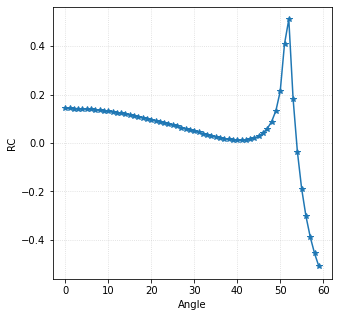

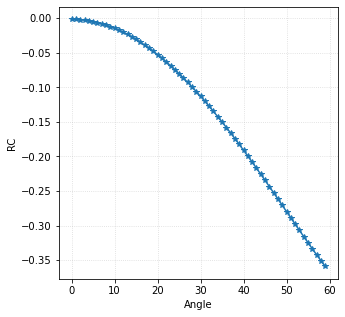

In [18]:
# Array of angles 
ang = np.arange(0, 60)
rc = np.ones(ang.shape)
gath = np.ones(ang.shape)

# Border between clay and water-saturated sandstone

for z in range(len(ang)):
    rc[z] = zoeppritz_rpp(2500, 900, 2400, 3200, 1800, 2500, theta1=ang[z])
    
gath = np.convolve(rc, signal.ricker(points, a), mode='same')
    
    

plt.figure(figsize=(5,5))
plt.plot(ang, rc, '-*')
plt.grid(ls=':',alpha=.5)
plt.xlabel('Angle')
plt.ylabel('RC')    

# Border between clay and gas-saturated sandstone
for z in range(len(ang)):
    rc[z] = zoeppritz_rpp(2500, 900, 2400, 2600, 1700, 2300, theta1=ang[z])
    
gath = np.convolve(rc, signal.ricker(points, a), mode='same')
    
    

plt.figure(figsize=(5,5))
plt.plot(ang, rc, '-*')
plt.grid(ls=':',alpha=.5)
plt.xlabel('Angle')
plt.ylabel('RC')    

<ipython-input-19-6b4dcf48d562>:38: ComplexWarning: Casting complex values to real discards the imaginary part
  rpp[i, j] = zoeppritz_rpp(vp[i], vs[i], density[i], vp[i+1], vs[i+1], density[i+1], theta1=ang[j])


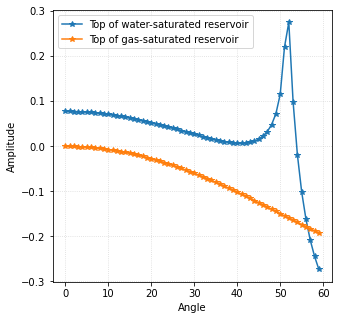

In [19]:
seismic_trace = np.ones((1000))
vp = np.ones(seismic_trace.shape)
vs = np.ones(seismic_trace.shape)
density = np.ones(seismic_trace.shape)


# Not-reservoir
vp[:200] *= 2500
vs[:200] *= 900
density[:200] *= 2400

vp[400:700] *= 2500
vs[400:700] *= 900
density[400:700] *= 2400

vp[900:1000] *= 2500
vs[900:1000] *= 900
density[900:1000] *= 2400

# Water-saturated reservoir
vp[200:400] *= 3200
vs[200:400] *= 1800
density[200:400] *= 2500

# Gas-saturated reservoir
vp[700:900] *= 2600
vs[700:900] *= 1700
density[700:900] *= 2300

# Sequence of RCs and Convolution

ang = np.arange(0, 60)
rpp = np.zeros((len(vp), len(ang)))
gath = np.zeros(rpp.shape)

for j in range(len(ang)):
    for i in range(len(vp)-1):
        rpp[i, j] = zoeppritz_rpp(vp[i], vs[i], density[i], vp[i+1], vs[i+1], density[i+1], theta1=ang[j])
    
    gath[:,j] = np.convolve(rpp[:, j], signal.ricker(points, a), mode='same')    
    
    
plt.figure(figsize=(5,5))
plt.plot(ang, gath[200, :], '-*', label='Top of water-saturated reservoir')
plt.plot(ang, gath[700, :], '-*', label='Top of gas-saturated reservoir')
plt.grid(ls=':',alpha=.5)
plt.xlabel('Angle')
plt.ylabel('Amplitude')
plt.legend()    

Text(0, 0.5, 'Amplitude')

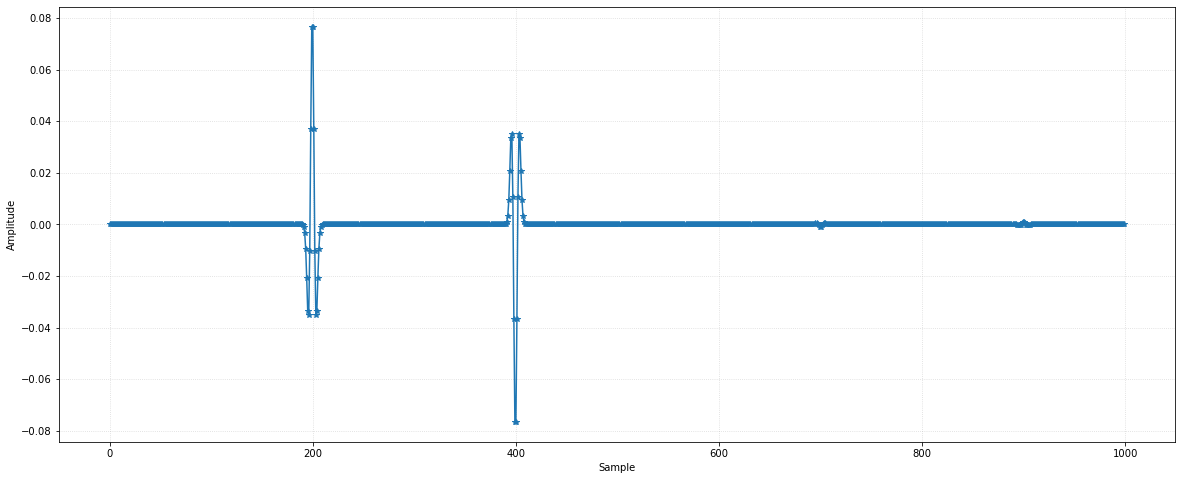

In [20]:
# Synthetic seismotrace

plt.figure(figsize=(20,8))
plt.plot(range(0, 1000), gath[:, 0], '-*')
plt.grid(ls=':',alpha=.5)
plt.xlabel('Sample')
plt.ylabel('Amplitude')


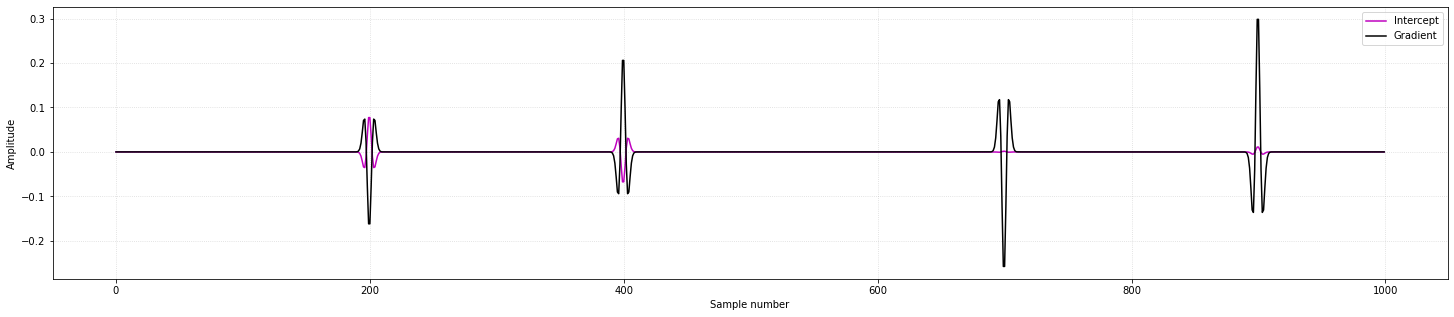

In [21]:
from scipy import stats

intercept = np.zeros(gath.shape[0])
gradient = np.zeros(gath.shape[0])

x = np.sin(np.deg2rad(ang))**2 
y = gath[25, :] 

for i in range(gath.shape[0]):
    y = gath[i, :] 
    gradient[i], intercept[i] = stats.linregress(x, y)[0:2]
    
plt.figure(figsize=(25, 5))

plt.plot(intercept, 'm', label='Intercept')
plt.plot(gradient, 'k', label='Gradient')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.grid(ls=':',alpha=.5)
plt.legend()